In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mass ,signal,c1,c3,wavelength,velocity,ratio,mass_per_length = np.loadtxt("./u-value.csv", skiprows=1, delimiter=',', unpack=True)

In [5]:
velocity_err = (velocity ** 2) * ((2 * (0.1/c1)) + (2 *(0.01/0.4)))
print(velocity_err)

[ 596.2    773.736 1124.968 1411.168 1874.016]


In [6]:
from scipy.optimize import curve_fit

tension = mass * 9.81

def line_fit(x_value,gradient):
  return gradient * x_value

initial_guess = [0.007]
fit, cov = curve_fit(line_fit,velocity ** 2,tension, p0=initial_guess, absolute_sigma=True, sigma=1/velocity_err )

gradient = fit

print(fit,cov)

[0.00066695] [[1.38410941e-16]]


In [7]:
print(tension)
tension_uncer = (tension) * (0.001 / mass)
print(tension_uncer)

[ 4.905  9.81  14.715 19.62  24.525]
[0.00981 0.00981 0.00981 0.00981 0.00981]


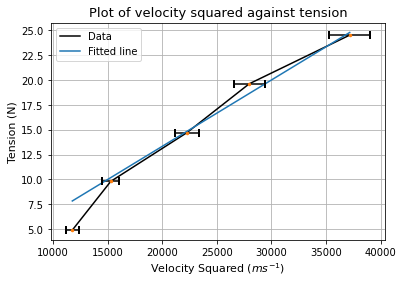

In [8]:
#%matplotlib tk
plt.plot(velocity ** 2, tension, 'black')
plt.title('Plot of velocity squared against tension', fontsize=13)
plt.plot(velocity ** 2,line_fit(velocity ** 2,fit))
#plt.title(r'$\alpha > \beta$')
plt.ylabel('Tension (N)', fontsize=11)
plt.xlabel('Velocity Squared ' r'($ms^{-1}$)', fontsize=11)
plt.errorbar(velocity ** 2, tension ,  xerr=velocity_err,fmt='.', mew=2, ms=3, capsize=4,ecolor='black' )
plt.grid()
plt.legend(['Data','Fitted line'])
#plt.show()